In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
bike_sharing=pd.read_csv('day (3).csv')
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
status=pd.get_dummies(bike_sharing['season'])
status.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [5]:
status=pd.get_dummies(bike_sharing['season'],drop_first=True)
status.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [6]:
bike_sharing=pd.concat([bike_sharing,status],axis=1)
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,2,3,4
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [7]:
bike_sharing.rename(columns={2:'winter',3:'spring',4:'summer'},inplace=True)
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,winter,spring,summer
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,0,0
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,0,0
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,0,0
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,0,0


In [8]:
statu=pd.get_dummies(bike_sharing['mnth'])
statu.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
statu=pd.get_dummies(bike_sharing['mnth'],drop_first=True)
statu.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [10]:
bike_sharing=pd.concat([bike_sharing,statu],axis=1)
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,3,4,5,6,7,8,9,10,11,12
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [11]:
bike_sharing.rename(columns={2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,...,0,0,0,0,0,0,0,0,0,1
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,...,0,0,0,0,0,0,0,0,0,1
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,...,0,0,0,0,0,0,0,0,0,1
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,...,0,0,0,0,0,0,0,0,0,1


In [12]:
statu=pd.get_dummies(bike_sharing['weekday'])
statu.head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [13]:
statu=pd.get_dummies(bike_sharing['weekday'],drop_first=True)
statu.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [14]:
bike_sharing=pd.concat([bike_sharing,statu],axis=1)
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,sep,oct,nov,dec,1,2,3,4,5,6
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,0,0,0,0,0,0,0,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,0,0,1,0,0,0


In [15]:
bike_sharing.rename(columns={1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'},inplace=True)
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,sep,oct,nov,dec,tue,wed,thu,fri,sat,sun
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,0,0,0,0,0,0,0,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,...,0,0,0,1,0,0,0,1,0,0
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,...,0,0,0,1,0,0,0,0,1,0
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,...,0,0,0,1,0,0,0,0,0,1
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,...,0,0,0,1,0,0,0,0,0,0


In [16]:
statu=pd.get_dummies(bike_sharing['weathersit'])
statu.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
statu=pd.get_dummies(bike_sharing['weathersit'],drop_first=True)
statu.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [18]:
bike_sharing=pd.concat([bike_sharing,statu],axis=1)
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,nov,dec,tue,wed,thu,fri,sat,sun,2,3
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,0,0,0,0,0,1,1,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,1,0,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,1,0,0,0,0,0


In [19]:
bike_sharing.rename(columns={2:'nor',3:'hot'},inplace=True)
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,nov,dec,tue,wed,thu,fri,sat,sun,nor,hot
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,0,0,0,0,0,1,1,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,1,0,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,...,0,1,0,0,0,1,0,0,1,0
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,...,0,1,0,0,0,0,1,0,1,0
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,...,0,1,0,0,0,0,0,1,1,0
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,...,0,1,0,0,0,0,0,0,0,0


In [20]:
bike_sharing.drop(['season','weathersit'],axis=1,inplace=True)
bike_sharing.drop(['instant','dteday','mnth','weekday'],axis=1,inplace=True)
bike_sharing

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,nov,dec,tue,wed,thu,fri,sat,sun,nor,hot
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114,...,0,1,0,0,0,1,0,0,1,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095,...,0,1,0,0,0,0,1,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,159,1182,1341,...,0,1,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796,...,0,1,0,0,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(bike_sharing,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(219, 32)


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

num_vars=['temp','atemp','hum','windspeed','casual','registered','cnt']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,nov,dec,tue,wed,thu,fri,sat,sun,nor,hot
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,0,0,0,0,1,1,0


In [23]:
y_train=df_train.pop('cnt')
X_train=df_train

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import sklearn as sl

In [25]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,step=2)
rfe=rfe.fit(X_train,y_train)


In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 3),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 8),
 ('casual', True, 1),
 ('registered', True, 1),
 ('winter', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('feb', True, 1),
 ('mar', False, 5),
 ('apr', False, 9),
 ('may', False, 8),
 ('jun', False, 4),
 ('jul', False, 9),
 ('aug', False, 7),
 ('sep', False, 5),
 ('oct', True, 1),
 ('nov', False, 7),
 ('dec', True, 1),
 ('tue', True, 1),
 ('wed', False, 4),
 ('thu', True, 1),
 ('fri', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('nor', False, 6),
 ('hot', False, 6)]

In [27]:
col=X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'atemp', 'hum', 'casual', 'registered', 'winter',
       'summer', 'feb', 'oct', 'dec', 'tue', 'thu', 'sat', 'sun'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['yr', 'workingday', 'windspeed', 'spring', 'mar', 'apr', 'may', 'jun',
       'jul', 'aug', 'sep', 'nov', 'wed', 'fri', 'nor', 'hot'],
      dtype='object')

In [29]:
X_train_rfe=X_train[col]

In [30]:
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)

In [31]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.274e+30
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:14:40   Log-Likelihood:                 16824.
No. Observations:                 510   AIC:                        -3.362e+04
Df Residuals:                     494   BIC:                        -3.355e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.984e-16   2.97e-16      1.006      0.3

In [33]:
X_train_rfe=X_train_rfe.drop(['const'],axis=1)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif=pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,atemp,349.51
1,temp,345.67
5,registered,11.07
3,hum,10.87
4,casual,5.90
7,summer,2.94
9,oct,1.77
14,sun,1.68
6,winter,1.66
11,tue,1.54


In [36]:
X_train_ac=X_train_rfe.drop(["atemp"],axis=1)

In [37]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_ac)

In [38]:
lm=sm.OLS(y_train,X_train_lm).fit()

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.891e+30
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:16:18   Log-Likelihood:                 17091.
No. Observations:                 510   AIC:                        -3.415e+04
Df Residuals:                     495   BIC:                        -3.409e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.567e-16   1.76e-16      1.462      0.1

In [40]:
vif=pd.DataFrame()
X=X_train_ac
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,temp,16.44
4,registered,11.05
2,hum,10.79
3,casual,5.89
6,summer,2.92
8,oct,1.77
13,sun,1.68
5,winter,1.63
10,tue,1.54
11,thu,1.52


In [41]:
X_train_ad=X_train_ac.drop(["oct"],axis=1)

In [42]:
X_train_lm=sm.add_constant(X_train_ad)

In [43]:
lm=sm.OLS(y_train,X_train_lm).fit()

In [44]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.607e+31
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:33   Log-Likelihood:                 17433.
No. Observations:                 510   AIC:                        -3.484e+04
Df Residuals:                     496   BIC:                        -3.478e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.567e-16   8.95e-17     -2.868      0.0

In [45]:
vif=pd.DataFrame()
X=X_train_ad
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,temp,16.43
4,registered,10.88
2,hum,10.76
3,casual,5.81
6,summer,2.07
12,sun,1.67
5,winter,1.63
9,tue,1.53
10,thu,1.52
11,sat,1.33


In [46]:
X_train_ae=X_train_ad.drop(["winter"],axis=1)
X_train_lm=sm.add_constant(X_train_ae)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.898e+30
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:18:12   Log-Likelihood:                 17109.
No. Observations:                 510   AIC:                        -3.419e+04
Df Residuals:                     497   BIC:                        -3.414e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.355e-16   1.67e-16     -4.392      0.0

In [47]:
vif=pd.DataFrame()
X=X_train_ae
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,temp,16.01
4,registered,10.76
2,hum,10.02
3,casual,5.61
5,summer,1.82
11,sun,1.67
8,tue,1.53
9,thu,1.51
10,sat,1.33
7,dec,1.30


In [48]:
X_train_af=X_train_ad.drop(["temp"],axis=1)
X_train_lm=sm.add_constant(X_train_af)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.044e+30
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:18:38   Log-Likelihood:                 17060.
No. Observations:                 510   AIC:                        -3.409e+04
Df Residuals:                     497   BIC:                        -3.404e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.314e-16   1.85e-16     -3.418      0.0

In [49]:
vif=pd.DataFrame()
X=X_train_af
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,registered,8.19
1,hum,6.70
2,casual,4.85
5,summer,1.78
11,sun,1.65
4,winter,1.59
8,tue,1.53
9,thu,1.52
10,sat,1.33
7,dec,1.28


In [50]:
X_train_ag=X_train_af.drop(["hum"],axis=1)

In [51]:
X_train_lm=sm.add_constant(X_train_ag)

In [52]:
lm=sm.OLS(y_train,X_train_lm).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.068e+31
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:20:04   Log-Likelihood:                 17554.
No. Observations:                 510   AIC:                        -3.508e+04
Df Residuals:                     498   BIC:                        -3.503e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.469e-17   3.84e-17     -0.903      0.3

In [54]:
vif=pd.DataFrame()
X=X_train_ag
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,registered,6.26
1,casual,4.79
4,summer,1.67
10,sun,1.58
3,winter,1.52
7,tue,1.48
8,thu,1.45
9,sat,1.28
6,dec,1.26
0,holiday,1.16


In [55]:
X_train_ah=X_train_ag.drop(["registered"],axis=1)

In [56]:
X_train_lm=sm.add_constant(X_train_ah)

In [57]:
lm=sm.OLS(y_train,X_train_lm).fit()

In [58]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     70.07
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.77e-88
Time:                        22:22:05   Log-Likelihood:                 262.19
No. Observations:                 510   AIC:                            -502.4
Df Residuals:                     499   BIC:                            -455.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2760      0.016     17.044      0.0

In [59]:
vif=pd.DataFrame()
X=X_train_ah
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,casual,2.16
9,sun,1.52
2,winter,1.48
3,summer,1.48
6,tue,1.28
5,dec,1.23
7,thu,1.16
8,sat,1.15
0,holiday,1.13
4,feb,1.06


In [60]:
X_train_ai=X_train_ah.drop(["dec"],axis=1)

In [61]:
X_train_lm=sm.add_constant(X_train_ai)

In [62]:
lm=sm.OLS(y_train,X_train_lm).fit()

In [63]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     78.00
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.96e-89
Time:                        22:24:24   Log-Likelihood:                 262.18
No. Observations:                 510   AIC:                            -504.4
Df Residuals:                     500   BIC:                            -462.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2755      0.016     17.447      0.0

In [64]:
vif=pd.DataFrame()
X=X_train_ai
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,casual,2.13
8,sun,1.49
2,winter,1.48
3,summer,1.29
5,tue,1.27
6,thu,1.16
7,sat,1.14
0,holiday,1.13
4,feb,1.06


In [65]:
X_train_aj=X_train_ai.drop(["winter"],axis=1)

In [66]:
X_train_lm=sm.add_constant(X_train_aj)

In [67]:
lm=sm.OLS(y_train,X_train_lm).fit()

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     87.84
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           2.33e-90
Time:                        22:25:53   Log-Likelihood:                 262.04
No. Observations:                 510   AIC:                            -506.1
Df Residuals:                     501   BIC:                            -468.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2732      0.015     17.994      0.0

In [69]:
vif=pd.DataFrame()
X=X_train_aj
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,casual,1.76
7,sun,1.48
4,tue,1.23
2,summer,1.21
6,sat,1.13
0,holiday,1.12
5,thu,1.11
3,feb,1.05


In [70]:
X_train_ak=X_train_aj.drop(["feb"],axis=1)

In [71]:
X_train_lm=sm.add_constant(X_train_ak)

In [72]:
lm=sm.OLS(y_train,X_train_lm).fit()

In [73]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     99.12
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.90e-90
Time:                        22:27:10   Log-Likelihood:                 259.85
No. Observations:                 510   AIC:                            -503.7
Df Residuals:                     502   BIC:                            -469.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2624      0.014     18.335      0.0

In [74]:
vif=pd.DataFrame()
X=X_train_ak
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,casual,1.75
6,sun,1.47
3,tue,1.22
2,summer,1.20
0,holiday,1.12
5,sat,1.11
4,thu,1.09


In [75]:
y_train_cnt=lm.predict(X_train_lm)

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

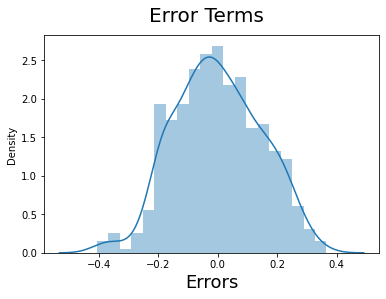

In [77]:
fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

In [78]:
num_vars=['temp','atemp','hum','windspeed','casual','registered','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [81]:
y_test=df_test.pop('cnt')
X_test=df_test

In [83]:
X_test_new=X_test[X_train_ak.columns]

In [84]:
X_test_new=sm.add_constant(X_test_new)

In [85]:
y_pred=lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

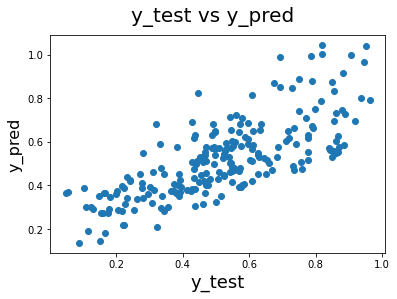

In [87]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)